# 서울의 업종별 지역
    *1. 서울에 어떠한 업종이 있는지 확인
    *2. 업종별로 어느 지역에 많이 분포되어 있는지 확인

## 환경 구축

In [1]:
#라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#한글폰드 설정
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9AB7-47B5

 C:\Users\dirhq\Untitled Folder 1\data 디렉터리

2020-11-30  오후 05:18    <DIR>          .
2020-11-30  오후 05:18    <DIR>          ..
2020-11-30  오전 11:16            57,732 seoul_municipalities_geo_simple.json
2020-11-30  오전 11:17       264,920,940 상가업소정보_201912_01.csv
               2개 파일         264,978,672 바이트
               2개 디렉터리  30,942,945,280 바이트 남음


In [4]:
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|' )
df.shape

(573680, 39)

In [5]:
# 모든 내용이 보이도록 컬럼을 39개로 지정
pd.options.display.max_columns = 39

In [6]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [7]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [8]:
#데이터 타입
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [9]:
#결측치 확인 true가 결측치
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [10]:
#결측치가 너무 많은 데이터를 제거
#결측치가 많은 데이터를 위에서 9개를 가져와서 not_use에 담는다
#not_use 변수에 담긴 인덱스값만 추출해서 not_use_col에 담는다
not_use=n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [11]:
#사용하지 않는 컬럼을 제가하고 잘 제거가 되었는지 shape로 확인 axis = 0 행, axis = 1 열
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

In [13]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [14]:
# 특정문자가 들어간 값 찾기 true가 있는거 |는 or &는 and
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [15]:
#코드와 번호가 들어간 열은 제거
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


In [56]:
# df_seoul_food에 "시도명"이 "서울특별시"에 대한 서브셋을 가져와서 담아주기
df_seoul= df[(df["시도명"] == "서울특별시")].copy()
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,대지,256,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로,71,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,대지,105,서울특별시 마포구 공덕동 105-67,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,대지,289,서울특별시 성동구 성수동2가 289-15,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,대지,165,서울특별시 강남구 논현동 165-8,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,대지,23,서울특별시 영등포구 여의도동 23,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


# 서울에 어떠한 업종이 가장 많은가?

In [114]:
#서울에 어떠한 업종이 많은까?
df_kind = df_seoul["상권업종대분류명"].value_counts()
df_kind = df_kind.reset_index()
df_kind = df_kind.rename(columns={"index":"상권업종대분류명", "상권업종대분류명":"개수"})
df_kind.head(10)
#음식, 소매, 생활서비스 순으로 일상생활에 필요한 것들이 많이 있는 것을 볼 수 있다.

,상권업종대분류명,개수
0,음식,132889
1,소매,126209
2,생활서비스,67137
3,학문/교육,31509
4,의료,19011
5,부동산,15701
6,관광/여가/오락,11643
7,숙박,3083
8,스포츠,194


<AxesSubplot:xlabel='상권업종대분류명', ylabel='개수'>

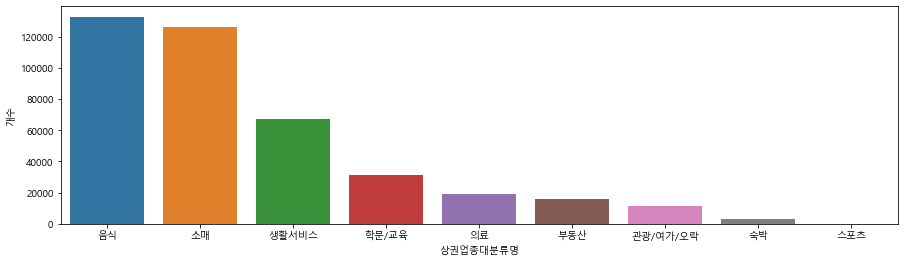

In [113]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_kind.head(10), x="상권업종대분류명", y="개수")

## 서울에서 음식 업종은 어느 지역에 많을까?

In [116]:
#음식 업종은 어느 지역에 가장 많은지?
df_food = df[(df["상권업종대분류명"] == "음식")]["시군구명"].value_counts()
df_food = df_food.reset_index()
df_food = df_food.rename(columns={"index":"시군구명", "시군구명":"개수"})
df_food.head(10)

,시군구명,개수
0,강남구,15554
1,서초구,7938
2,강서구,7897
3,중구,7807
4,마포구,7016
5,송파구,6825
6,광진구,6812
7,영등포구,6481
8,부산진구,6359
9,종로구,6009


<AxesSubplot:xlabel='시군구명', ylabel='개수'>

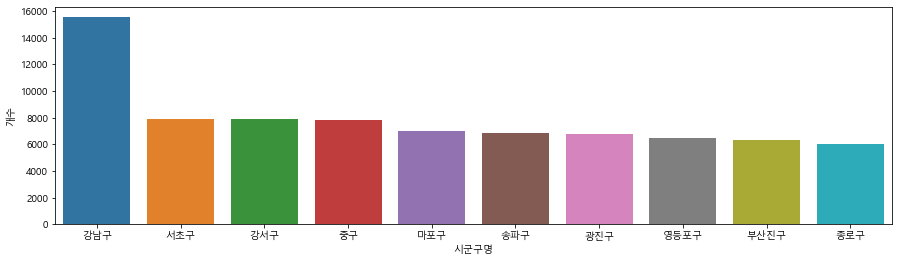

In [118]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_food.head(10), x="시군구명", y="개수")

### 강남구에서 음식업종

In [120]:
#강남구에서 음식업종이 무엇이 있는지
df_food_menu = df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식")]["상권업종소분류명"].value_counts()
df_food_menu = df_food_menu.reset_index()
df_food_menu = df_food_menu.rename(columns={"index":"상권업종소분류명", "상권업종소분류명":"개수"})
df_food_menu.head(10)

,상권업종소분류명,개수
0,한식/백반/한정식,3151
1,커피전문점/카페/다방,2727
2,정통양식/경양식,1213
3,라면김밥분식,754
4,호프/맥주,589
5,음식점-일식,551
6,제과점,541
7,갈비/삼겹살,424
8,룸살롱/단란주점,395
9,후라이드/양념치킨,386


<AxesSubplot:xlabel='상권업종소분류명', ylabel='개수'>

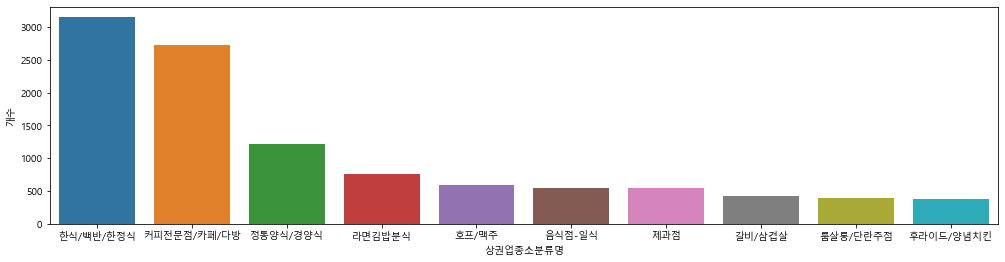

In [122]:
plt.figure(figsize=(17,4))
sns.barplot(data=df_food_menu.head(10), x="상권업종소분류명", y="개수")

## 서울에서 부동산업종은 어느 지역에 많은까?

In [125]:
#부동산 업종은 어느 지역에 가장 많은지?
df_real_estate = df[(df["상권업종대분류명"] == "부동산")]["시군구명"].value_counts()
df_real_estate.head(5)
df_real_estate = df_real_estate.reset_index()
df_real_estate = df_real_estate.rename(columns={"index":"시군구명", "시군구명":"개수"})
df_real_estate.head(10)

,시군구명,개수
0,강남구,2508
1,서초구,1240
2,강서구,1219
3,송파구,930
4,광진구,923
5,강동구,761
6,해운대구,761
7,영등포구,685
8,마포구,660
9,관악구,615


### 강남구에서 부동산업종

In [126]:
#강남구에서 부동산업종이 무엇이 있는지
df_real_estate_kind = df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "부동산")]["상권업종소분류명"].value_counts()
df_real_estate_kind = df_real_estate_kind.reset_index()
df_real_estate_kind = df_real_estate_kind.rename(columns={"index":"상권업종소분류명", "상권업종소분류명":"개수"})
df_real_estate_kind.head(10)

,상권업종소분류명,개수
0,부동산중개,2097
1,건물분양-종합,270
2,주택공급,73
3,부동산자문,50
4,부동산감정평가,14
5,상가분양,3
6,부동산신탁,1


<AxesSubplot:xlabel='상권업종소분류명', ylabel='개수'>

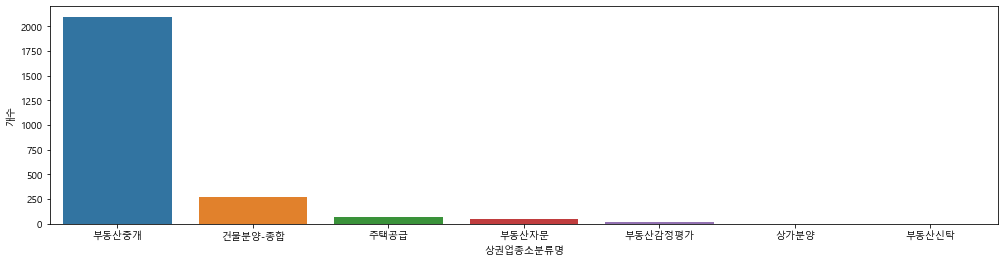

In [127]:
plt.figure(figsize=(17,4))
sns.barplot(data=df_real_estate_kind.head(10), x="상권업종소분류명", y="개수")

## 서울에서 학문/교육 업종은 어느 지역에 많을까?

In [128]:
#학문/교육 업종은 어느 지역에 가장 많은지?
df_study = df[(df["상권업종대분류명"] == "학문/교육")]["시군구명"].value_counts()
df_study = df_study.reset_index()
df_study = df_study.rename(columns={"index":"시군구명", "시군구명":"개수"})
df_study.head(10)

,시군구명,개수
0,강남구,4005
1,서초구,2103
2,양천구,1881
3,광진구,1848
4,송파구,1797
5,강서구,1744
6,강동구,1585
7,노원구,1582
8,해운대구,1525
9,은평구,1333


<AxesSubplot:xlabel='시군구명', ylabel='개수'>

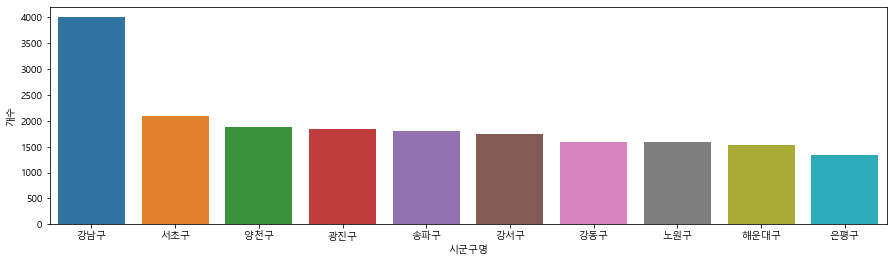

In [123]:
#인덱스 그래프로
plt.figure(figsize=(15,4))
sns.barplot(data=study.head(10), x="시군구명", y="개수")

### 강남구에서 어느 동에 많은가?

In [96]:
#강남구안에 무슨 동에 많이 있는지
df_study_dong = df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "학문/교육")]["법정동명"].value_counts()
df_study_dong = df_study_dong.reset_index()
df_study_dong = df_study_dong.rename(columns={"index":"법정동명", "법정동명":"개수"})
df_study_dong.head(5)

,법정동명,개수
0,대치동,1724
1,역삼동,607
2,신사동,381
3,개포동,289
4,도곡동,260


### 강남구에서 학문/교육 업종

In [129]:
#강남구에 학문/교욱업종엔 무엇이 있는지
df_study_kind = df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "학문/교육")]["상권업종소분류명"].value_counts().head(30)
df_study_kind = df_study_kind.reset_index()
df_study_kind = df_study_kind.rename(columns={"index":"상권업종소분류명", "상권업종소분류명":"개수"})
df_study_kind.head(10)

,상권업종소분류명,개수
0,학원-입시,1241
1,학원-외국어/어학,667
2,학원(종합),564
3,피아노/바이올린/기타,266
4,서예/서화/미술,219
5,어린이집,189
6,고시원,139
7,독서실,125
8,학원-기타,101
9,학원-배우/탤런트,41


<AxesSubplot:xlabel='상권업종소분류명', ylabel='개수'>

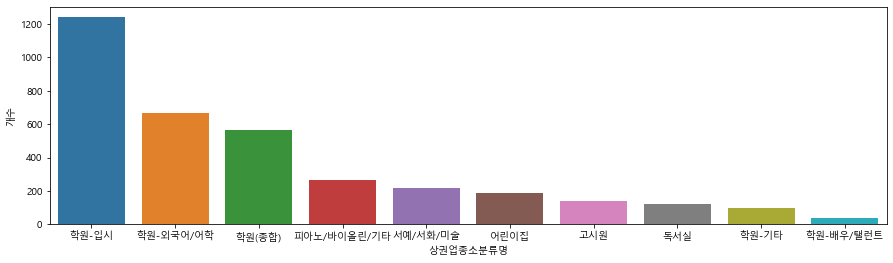

In [131]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_study_kind.head(10), x="상권업종소분류명", y="개수")

## 서울에서 의료 업종은 어느 지역에 많을까?

In [134]:
#의료 업종은 어느 지역에 가장 많은지?
df_medic = df[(df["시도명"] =="서울특별시") & (df["상권업종대분류명"] == "의료")]["시군구명"].value_counts()
df_medic = df_medic.reset_index()
df_medic = df_medic.rename(columns={"index":"시군구명", "시군구명":"개수"})
df_medic.head(10)

,시군구명,개수
0,강남구,3136
1,서초구,1495
2,동대문구,1155
3,송파구,1026
4,광진구,938
5,강서구,807
6,은평구,742
7,노원구,742
8,영등포구,734
9,성북구,712


### 강남구에서 의료 업종

In [133]:
df_medic_kind = df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "의료")]["상권업종소분류명"].value_counts()
df_medic_kind = df_medic_kind.reset_index()
df_medic_kind = df_medic_kind.rename(columns={"index":"상권업종소분류명", "상권업종소분류명":"개수"})
df_medic_kind.head(10)

,상권업종소분류명,개수
0,치과의원,497
1,정형/성형외과,448
2,약국,374
3,한의원,370
4,내과/외과,364
5,기타병원,210
6,일반병원,167
7,피부과,160
8,안과의원,77
9,동물병원,71


<AxesSubplot:xlabel='상권업종소분류명', ylabel='개수'>

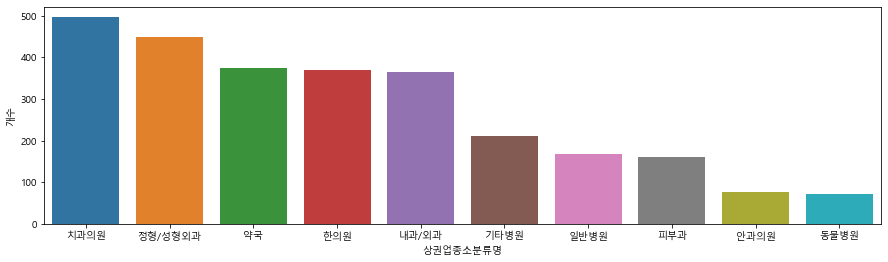

In [135]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_medic_kind.head(10), x="상권업종소분류명", y="개수")